In [33]:
import pandas as pd
import time
import seaborn as sns
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import sys
sys.path.append('/Users/milo1226/Desktop/7_python_projects/KerbalSpaceProgram/')
import AirResistanceModule as Arm

%matplotlib inline

In [60]:
with open('/Users/milo1226/Desktop/7_python_projects/KerbalSpaceProgram/flight_est_profile_07312021_145853.pkl', 'rb') as f:
    est_decent = pickle.load(f)
with open('/Users/milo1226/Desktop/7_python_projects/KerbalSpaceProgram/flight_telemetry_07312021_145853.pkl', 'rb') as f:
    flight_readings = pickle.load(f)

In [61]:
flight = pd.DataFrame(flight_readings, columns =['obs_time', 'mass', 'velocity_act','obs_altitude', 'mean_alt', 'throttle','status','drag','CoM','acceleration'])

In [62]:
# break up drag tuple
flight['drag_x'] = flight['drag'].apply(lambda x: x[0])
flight['drag_y'] = flight['drag'].apply(lambda x: x[1])
flight['drag_z'] = flight['drag'].apply(lambda x: x[2])
flight.tail()

,obs_time,mass,velocity_act,obs_altitude,mean_alt,throttle,status,drag,CoM,acceleration,drag_x,drag_y,drag_z
132,81.069463,6290.765625,-125.879722,241.561194,309.114961,1,Powered Decent,"(18646.59944913127, 0.6576976382454978, -211.6...","(0.0, 0.0, 0.0)",24.210166,18646.599449,0.657698,-211.643872
133,81.686890,6255.139160,-115.442275,178.921114,246.475189,1,Powered Decent,"(16290.246208050648, 0.7229483094574283, -199....","(0.0, 0.0, 0.0)",23.889645,16290.246208,0.722948,-199.973738
134,82.293344,6219.512695,-105.142717,121.671141,189.225633,1,Powered Decent,"(13952.491628455959, 0.7501468336412621, -186....","(0.0, 0.0, 0.0)",23.575230,13952.491628,0.750147,-186.464204
135,82.916755,6183.886230,-94.977797,69.740298,137.295221,1,Powered Decent,"(11654.044420080545, 0.778541930599733, -170.4...","(0.0, 0.0, 0.0)",23.272532,11654.044420,0.778542,-170.462921
136,83.517994,6149.630371,-85.324597,24.759678,92.314636,1,Powered Decent,"(9532.719019399969, 0.7952768981952701, -153.2...","(0.0, 0.0, 0.0)",26.831523,9532.719019,0.795277,-153.220239


In [63]:
#  convert est_decent from dictionary to dataframe - deprecated
# decent_list = []
# for second in est_decent.keys():
#     decent_list.append((second, est_decent[second]['height'], est_decent[second]['velocity']))
decent = pd.DataFrame(est_decent, columns =['time', 'est_altitude', 'velocity_est','acceleration','drag'])
decent['adjust_time'] = decent['time'].apply(lambda x: round(x + 20.0,1))
flight['adjust_time'] = flight['obs_time'].apply(lambda x: round(x,1))
decent.tail(), flight.tail()

(     time  est_altitude  velocity_est  acceleration    drag  adjust_time
 97   49.0      414.2304     -259.5311       -1.1184 -8.6916         69.0
 98   49.5      284.3298     -260.0715       -1.0808 -8.7292         69.5
 99   50.0      154.1635     -260.5937       -1.0444 -8.7656         70.0
 100  50.5       23.7405     -261.0983       -1.0092 -8.8008         70.5
 101  51.0     -106.9305     -261.5858       -0.9751 -8.8349         71.0,
       obs_time         mass  velocity_act  obs_altitude    mean_alt  throttle  \
 132  81.069463  6290.765625   -125.879722    241.561194  309.114961         1   
 133  81.686890  6255.139160   -115.442275    178.921114  246.475189         1   
 134  82.293344  6219.512695   -105.142717    121.671141  189.225633         1   
 135  82.916755  6183.886230    -94.977797     69.740298  137.295221         1   
 136  83.517994  6149.630371    -85.324597     24.759678   92.314636         1   
 
              status                                         

In [64]:
max_altitude_experienced = flight['obs_altitude'].max()
max_altitude_expected = decent['est_altitude'].max()
max_velocity_experienced = flight['velocity_act'].max()
max_velocity_expected = decent['velocity_est'].max()
min_altitude_experienced = flight['obs_altitude'].min()
min_altitude_expected = decent['est_altitude'].max()
min_velocity_experienced = flight['velocity_act'].min()
min_velocity_expected = decent['velocity_est'].min()
print('''
Maximum Altitude
----------------
Obs: {}
Est: {}

Maximum Velocity
----------------
Obs: {}
Est: {}

Minimum Velocity
----------------
Obs: {}
Est: {}
'''.format(max_altitude_experienced,max_altitude_expected,max_velocity_experienced,max_velocity_expected,min_velocity_experienced,min_velocity_expected))


Maximum Altitude
----------------
Obs: 8809.972396100755
Est: 8808.8399

Maximum Velocity
----------------
Obs: 307.4180650395467
Est: -5.0125

Minimum Velocity
----------------
Obs: -271.53381177912047
Est: -261.5858



In [65]:
result = pd.concat([decent[['adjust_time','time','est_altitude','velocity_est']].set_index('adjust_time'), flight[['adjust_time','obs_time','obs_altitude','velocity_act']].set_index('adjust_time')], axis=1, join="outer")
result['delta_alt'] = result['obs_altitude'] - result['est_altitude']
result['delta_v'] = abs(result['velocity_act']) - abs(result['velocity_est'])
result

,time,est_altitude,velocity_est,obs_time,obs_altitude,velocity_act,delta_alt,delta_v
adjust_time,,,,,,,,
0.5,NaN,NaN,NaN,0.500012,5166.194666,307.418065,NaN,NaN
1.1,NaN,NaN,NaN,1.117020,5335.447080,296.829255,NaN,NaN
1.7,NaN,NaN,NaN,1.720750,5493.233683,287.437034,NaN,NaN
2.3,NaN,NaN,NaN,2.324936,5651.752698,278.308997,NaN,NaN
2.9,NaN,NaN,NaN,2.928195,5794.465589,270.186443,NaN,NaN
3.5,NaN,NaN,NaN,3.536205,5948.771302,261.365309,NaN,NaN
4.1,NaN,NaN,NaN,4.137463,6087.861673,253.347417,NaN,NaN
4.7,NaN,NaN,NaN,4.741779,6227.581874,245.216446,NaN,NaN
5.3,NaN,NaN,NaN,5.344755,6367.565222,236.978586,NaN,NaN


/Users/milo1226/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


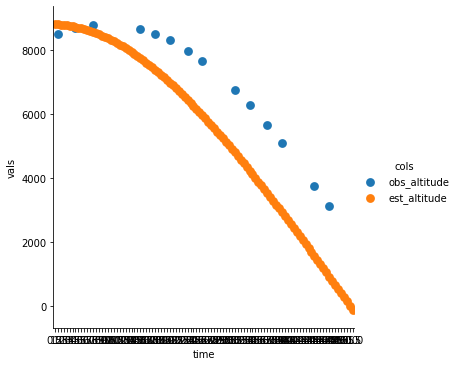

In [66]:
result_melted = result[['time','obs_altitude','est_altitude']].melt('time', var_name='cols',  value_name='vals')
g = sns.factorplot(x="time", y="vals", hue='cols', data=result_melted)

/Users/milo1226/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


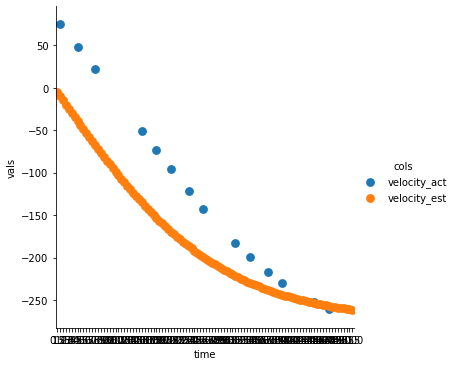

In [67]:
result_melted = result[['time','velocity_act','velocity_est']].melt('time', var_name='cols',  value_name='vals')
g = sns.factorplot(x="time", y="vals", hue='cols', data=result_melted)

In [631]:
# =surface_alt+(velocity*time_step)-(0.5*(9.81+Fd)*(time_step^2))
# simple_time	mass	velocity	surface_alt
# 1.000008106	7532.206055	180.1428287	2187.362845
initial_velocity = 180.1428287
initial_altitude = 2187.362845
mass = 7532.206055
time_step = 1.000008106

current_altitude = initial_altitude
current_velocity = initial_velocity
density = 4.336714412
time_stamp = time_step
data = []

# =((math.pi*(1.25^2))*0.82*0.05*(current_velocity^2)*density)/mass

while current_altitude > 0:
    next_drag =((math.pi*(pow(1.25,2)))*0.82*0.05*(pow(current_velocity,2))*density)/mass
    if current_velocity < 0:
        next_drag *= -1
    next_altitude = current_altitude + (current_velocity * time_step) - (0.5 * (9.81 + next_drag) * pow(time_step, 2))
    #     =SQRT((current_velocity^2)-(2*(9.81+drag)*(next_altitude-current_altitude))) determining the next velocity
    next_velocity = math.sqrt(pow(current_velocity,2) - (2 * (9.81 + next_drag) * (next_altitude-current_altitude)))
    sign_aid = (next_altitude - current_altitude)
    next_velocity = next_velocity * (sign_aid/abs(sign_aid))
    current_altitude = next_altitude
    current_velocity = next_velocity
    data.append((round(time_stamp,4),round(next_altitude,4), round(next_velocity,4), round(next_drag,4)))
    time_stamp += time_step
#     print((round(time_stamp + 1,4),round(next_altitude,4), round(next_velocity,4), round(next_drag,4)))

est_decent = pd.DataFrame(data, columns =['time(s)','obs_altitude(m)','velocity(m/s)','drag(m/s^2)'])
est_decent

,time(s),surface_alt(m),velocity(m/s),drag(m/s^2)
0,1.0000,2360.7219,166.5724,3.7603
1,2.0000,2520.7829,153.5472,3.2151
2,3.0000,2668.0602,141.0051,2.7320
3,4.0000,2803.0094,128.8911,2.3039
4,5.0000,2926.0339,117.1560,1.9250
5,6.0000,3037.4905,105.7554,1.5905
6,7.0001,3137.6937,94.6493,1.2960
7,8.0001,3226.9197,83.8012,1.0381
8,9.0001,3305.4096,73.1773,0.8138
9,10.0001,3373.3722,62.7468,0.6205


In [625]:
len(data)

46

In [617]:
# reverse the list to get the most likely responses first
data.reverse()
positions_of_interest = []

In [618]:
def calc_difference_sign(distance):
    return int(distance/abs(distance))

def calc_difference(stopping_distance,alt):
    return alt - stopping_distance

def calc_distance(velocity, time_to_burn, acceleration):
    return ((abs(velocity) * time_to_burn) + (.5 * acceleration * time_to_burn ** 2))

def submit_information(datum, acceleration):
    alt,velocity = datum[1],datum[2]
    time_to_burn = abs(velocity) / acceleration
    stopping_distance = calc_distance(velocity,time_to_burn,acceleration)
    difference = calc_difference(stopping_distance,alt)
    differences[difference] = {'altitude': alt, 'time_to_burn': time_to_burn, 'stopping_distance': stopping_distance, 'difference': difference, 'velocity': velocity, 'data_index': data_position}    

In [619]:
# determine the close data points to a successful landing opportunity
data_position = 0
acceleration = 34
distances = []
differences = {}
difference_sign = -1
#  I am attempting to limit the number of data points in distances
for datum in data:
    alt,velocity = datum[1],datum[2]
    if velocity < 0 and alt > 0:
        time_to_burn = abs(velocity) / acceleration
        stopping_distance = calc_distance(velocity,time_to_burn,acceleration)
        difference = calc_difference(stopping_distance,alt)
        if calc_difference_sign(difference) != difference_sign:
            print(data_position)
            print('Velocity: {} Alt: {} Sign: {} Current:{}'.format(velocity,alt,calc_difference_sign(difference),difference_sign))
            submit_information(data[data_position - 1], acceleration)
            submit_information(data[data_position], acceleration)
            break
    data_position += 1
            
differences


9
Velocity: -177.0357 Alt: 1602.1351 Sign: 1 Current:-1


{-58.90457335294127: {'altitude': 1422.0088,
  'time_to_burn': 5.38864705882353,
  'stopping_distance': 1480.9133733529413,
  'difference': -58.90457335294127,
  'velocity': -183.214,
  'data_index': 9},
 219.4157290666178: {'altitude': 1602.1351,
  'time_to_burn': 5.206932352941176,
  'stopping_distance': 1382.7193709333822,
  'difference': 219.4157290666178,
  'velocity': -177.0357,
  'data_index': 9}}

In [620]:
# low_alt = differences[-58.90457335294127]['altitude']
# low_vel = differences[-58.90457335294127]['velocity']

low_alt = 643.5607
low_vel = -205.3775

In [621]:
thrust = (acceleration + 9.81) * mass
thrust

329985.94726955

In [622]:
mass - (thrust/(250*9.81))*time_step

7397.654119368751

In [623]:
def calculate_acceleration_due_to_thrust(thrust, mass, gravity, air_resistance):
    ''' results are in meters / s^2 '''
    return (thrust / mass) - (gravity + air_resistance)

In [624]:
initial_mass = 7532.206055
time_step = 1.000008106/2

current_landing_altitude = low_alt
current_landing_velocity = low_vel
density = 4.336714412
time_stamp = time_step
current_landing_mass = initial_mass
landing_data = []

# =((math.pi*(1.25^2))*0.82*0.05*(current_velocity^2)*density)/mass

while current_landing_velocity < 0 and current_landing_altitude > 0:
    current_landing_mass = current_landing_mass - (thrust/(250*9.81))*time_step
    next_drag =((math.pi*(pow(1.25,2)))*0.82*0.05*(pow(current_landing_velocity,2))*density)/current_landing_mass
    if current_landing_velocity < 0:
        next_drag *= -1
    acceleration = calculate_acceleration_due_to_thrust(thrust,current_landing_mass, 9.81, next_drag)
    print('Acceleration: {} Mass: {} Drag: {}'.format(acceleration,current_landing_mass,next_drag))
    next_landing_altitude = current_landing_altitude + (current_landing_velocity * time_step) - (0.5 * (-acceleration) * pow(time_step, 2))
    next_landing_velocity = math.sqrt(pow(current_landing_velocity,2) - (2 * (-acceleration) * (next_landing_altitude-current_landing_altitude)))
    sign_aid = (next_landing_altitude - current_landing_altitude)
    next_landing_velocity = next_landing_velocity * (sign_aid/abs(sign_aid))
#     at this point, we would be rising again
    if next_landing_velocity > 0:
        break
    current_landing_altitude = next_landing_altitude
    current_landing_velocity = next_landing_velocity
    landing_data.append((round(time_stamp,4),round(next_landing_altitude,4), round(next_landing_velocity,4), round(next_drag,4)))
#     print((round(time_stamp,4),round(next_landing_altitude,4), round(next_landing_velocity,4), round(next_drag,4)))
    time_stamp += time_step
    

    
landing_data

Acceleration: 39.282455205878186 Mass: 7464.930087184375 Drag: -4.8876276434523165
Acceleration: 38.794305319029796 Mass: 7397.654119368751 Drag: -3.9974688888740078
Acceleration: 38.41234254352004 Mass: 7330.378151553126 Drag: -3.2061182168617908
Acceleration: 38.131669558407815 Mass: 7263.102183737502 Drag: -2.50847325718996
Acceleration: 37.9484454035791 Mass: 7195.8262159218775 Drag: -1.900480332187422
Acceleration: 37.859798403892 Mass: 7128.550248106253 Drag: -1.3790470190346114
Acceleration: 37.863760791281706 Mass: 7061.274280290629 Drag: -0.9419763893354326
Acceleration: 37.959222551495344 Mass: 6993.998312475004 Drag: -0.587920451241323
Acceleration: 38.14590275217651 Mass: 6926.72234465938 Drag: -0.3163510493462808
Acceleration: 38.42433723921893 Mass: 6859.446376843755 Drag: -0.12754710765341362
Acceleration: 38.79588215438062 Mass: 6792.170409028131 Drag: -0.022597666857497364
Acceleration: 39.26273325961525 Mass: 6724.8944412125065 Drag: -0.0034206995130968256


[(0.5, 545.7815, -185.7361, -4.8876),
 (1.0, 457.7621, -166.3388, -3.9975),
 (1.5, 379.3936, -147.1325, -3.2061),
 (2.0, 310.5933, -128.0665, -2.5085),
 (2.5, 251.3032, -109.0921, -1.9005),
 (3.0, 201.4892, -90.1621, -1.379),
 (3.5, 161.1409, -71.23, -0.942),
 (4.0, 130.2706, -52.2503, -0.5879),
 (4.5, 108.9135, -33.1772, -0.3164),
 (5.0, 97.1279, -13.9648, -0.1275),
 (5.5, 94.995, -5.4333, -0.0226)]